## <h1><center> Laboratorio di WebScraping </h1>
<h1><center> Anno Accademico 2024-2025 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 22 </h1>
<h1><center>  Un algoritmo di clustering: k-mean</h1> 
<h1><center> Proposte di tesi triennali </h1> 
<h1><center> 7 Maggio 2025 </h1>

## Tecniche avanzate di data analysis

* **supervised learning**: risolve problemi di **classificazione**
    * utilizza un dataset **etichettato**  D={ (xᵢ, yᵢ) }ᵢ₌₁..n  per **apprendere una funzione**
    * ogni xᵢ è un vettore di features
    * yᵢ sono **etichette** associate ad un insieme di features
   * la funzione appresa può predire un valore target y dato x non appartenente al dataset. 
* **unsupervised learning**
    * tecniche orientate a capire la struttura intrinseca di un insieme di dati **non etichettati**
    * esempi: **k-menas**, **dbscan**
* in questa lezione analizzeremo la tecnica del **k-means**
    
    

## k-means: un esempio semplice

* supponiamo che un insegnante desideri raggruppare i suoi studenti in base a una **misura di 
  rendimento** ottenuta da alcune valutazioni. 
* dopo che gli studenti sono stati raggruppati, i vari gruppi possono ricevere un'azione didattica più mirata, a seconda del loro livello di apprendimento
* partiamo da una situazione molto semplice, in cui si considerano **n=3 studenti**, ognuno di essi ha  dato 2 **esami**
* i voti ottenuti sono i seguenti

| Studenti | Esame1   | Esame2   |
|:--------:|:--------:|:--------:|
|     A    |    70    |     82   |
|     B    |    75    |     80   |
|     C    |    95    |     90   |

* per individuare gruppi di studenti con **valutazioni uniformi**, applichiamo una tecnica di **clustering**


## Inizializazione: primo passo, stabilire una misura di similarità

* quanto sono simili due **valutazioni**?
* rappresentiamo ogni studente come un punto nel piano
    * coordinate sono i voti ottenuti da quello studente nelle diverse prove (2 nel nostro caso)
* **distanza** tra i due studenti = **distanza euclidea** tra i punti corrispondenti agli studenti

## Data Set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# righe: studenti; colonne: voti
data = np.array([[70, 82],
                 [75, 80],
                 [95, 90]])
# numero di studenti
nobs = data.shape[0]
nobs

3

## Data Set up

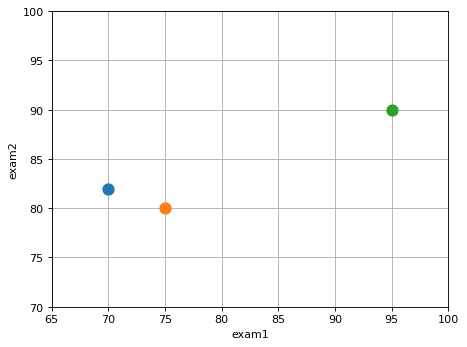

In [3]:
plt.figure(dpi=80) 
for i in range(nobs):
    plt.plot(data[i][0],data[i][1],marker="o", markersize=10)
plt.xlim(65, 100)
plt.ylim(70, 100)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.grid()

## Inizializzazione: secondo passo, stabilire il  numero di clusters

* **un singolo cluster** 
    * nessuna diversificazione, non classifica gli studenti
* **n cluster** (nel nostro caso, tanti quanti sono gli studenti)
    * ogni studente  in un cluster diverso, nessuna classificazione
* **1<k<n** cluster: la soluzione deve appartenere a questo range
* stabiliamo arbitrariamente il numero iniziale di cluster
    * nel nostro caso, banalmente, deve essere **k=2**
    * vedremo che sarà necessario, in generale, valutare diversi valori di **k**

## Inizializzazione: terzo passo, stabilire i centroidi iniziali

* **centroide** di un cluster: **punto centrale** di un cluster 
    * generalmente calcolato come **valore medio** degli elementi associati al cluster
    * non necessariamente coincide con un elemento del cluster
* inizializzazione dei centroidi può essere **casuale**, oppure si utilizzano tecniche più sofisticate
* nel nostro caso **2 centroidi**, tanti quanti sono i cluster
    * centroide **0** corrisponde al punto (studente)  **A**
    * centroide **1** corrisponde al punto (studente) **C**

## Inizializzazione: terzo passo, stabilire i centroidi iniziali

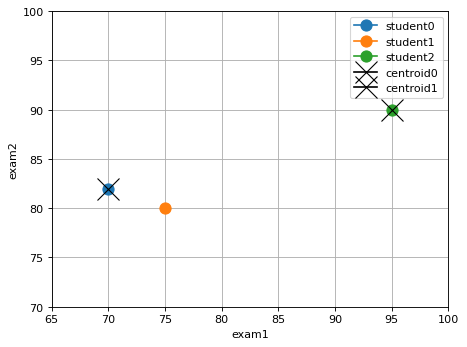

In [5]:
plt.figure(dpi=80) 
k=2
for i in range(nobs):
    plt.plot(data[i][0],data[i][1],marker="o", markersize=10, label='student'+str(i))
plt.plot(data[0][0],data[0][1],marker="x", color="black", markersize=20, label='centroid'+'0')
plt.plot(data[2][0],data[2][1],marker="x", color="black", markersize=20, label='centroid'+'1')
plt.xlim(65, 100)
plt.ylim(70, 100)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend()
plt.grid()

## L'algoritmo: assegnamento elementi-centroidi

* ad ogni iterazione, l'algoritmo considera i punti e **li assegna al centroide più vicino**, secondo la nozione di similarità definita
* in questo modo si vengono a formare dei **cluster**
* nel nostro caso, utilizziamo la **distanza euclidea** per valutare la similarità tra punti

| Studenti | exam1    | exam2    | distanza(C0)   | distanza C(1)  | centroide|
|:--------:|:--------:|:--------:|:--------:      |:--------:      |:--------:|
|     A    |    70    |     82   |     0          | 26.2           |0         |
|     B    |    75    |     80   |     5.4        | 22.4           |0         |
|     C    |    95    |     90   |    26.2        | 0              |1         |


## L'algoritmo: assegnamento elementi-centroidi

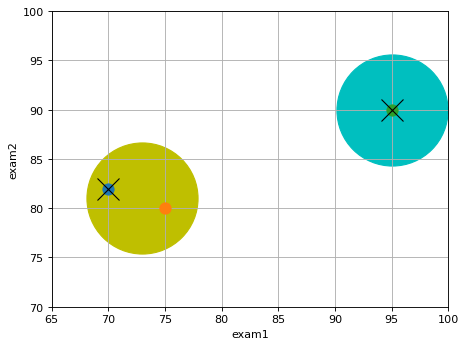

In [7]:
plt.figure(dpi=80) 
k=2
for i in range(nobs):
    plt.plot(data[i][0],data[i][1],marker="o", markersize=10, label='student'+str(i))
plt.plot(data[0][0],data[0][1],marker="x", color="black", markersize=20)
plt.plot(data[2][0],data[2][1],marker="x", color="black", markersize=20)
plt.scatter(73 ,81, s =10000, c='y')
plt.scatter(95 ,90, s =10000, c='c')
plt.xlim(65, 100)
plt.ylim(70, 100)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.grid()

## L'algoritmo: calcolo dei nuovi centroidi

* l'algoritmo a questo punto ricalcola i nuovi centroidi, basandosi sull'ultimo assegnamento dei punti ai centrodi
* i nuovi centroidi sono calcolati considerando i valori medi rispetto ai punto assegnati a quel centroide
* nel nostro caso

| Studenti | Esame1   | Esame2   |
|:--------:|:--------:|:--------:|
|     A    |    70    |     82   |
|     B    |    75    |     80   |
|     C    |    95    |     90   |

| Centroid  | media_exam_1  | media exam_2  |
|:--------: |:--------:     |:--------:     | 
|     0     |     72.5      |      81      |    
|     1     |     95        |      90       |    

    

## L'algoritmo: calcolo dei nuovi centroidi

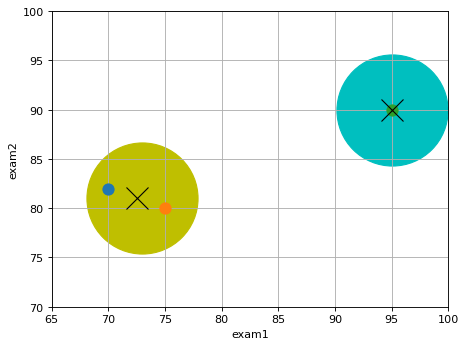

In [9]:
plt.figure(dpi=80) 
k=2
for i in range(nobs):
    plt.plot(data[i][0],data[i][1],marker="o", markersize=10, label='student'+str(i))
plt.plot(72.5,81,marker="x", color="black", markersize=20)
plt.plot(data[2][0],data[2][1],marker="x", color="black", markersize=20)
plt.scatter(73 ,81, s =10000, c='y')
plt.scatter(95 ,90, s =10000, c='c')
plt.xlim(65, 100)
plt.ylim(70, 100)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.grid()

## Terminazione dell'algoritmo 

* algoritmo iterativo: ad ogni iterazione
    * assegnamento punti ai centroidi
    * ricalcolo dei centroidi
* terminazione: quando i centroidi rimangono invaraiti 

 

## Valutazione della soluzione: WSSE

* **WSSE (Within Cluster Sum of Squared errors)**, o **somma dei quadrati inter-cluster**
    <center>
    $WSSE(dist,k)=\sum_{j=1}^{k} \sum_{x_i \in C_j} dist(x_i-\bar{x_j})$
    </center>
* in cui
    * $x_i$ elemento generico
    * $\bar{x_j}$ **centroide** del generico cluster $C_j$
    * $k$ numero dei centroidi
* indicata anche come **inerzia**
* per il nostro clustering, il valore del **WWSE** è **14.5**

## Valutazione della soluzione: quale è il valore di k migliore?

* come scegliere il k migliore?
* minimizzare **WSSE**  non funziona
    * questa misura è minimizzata banalmente impostando k = n (dove n è il numero di punti, nel nostro caso studenti)
    * se ogni punto sta in un cluster diverso, allora **WSSE=0**
    * ma non è una soluzione che vogliamo considerare
* approcci alternativi
    * **elbow method** 
    * **silhouette analysis**

## Valutazione della soluzione: elbow method

* man mano che k aumenta, la WSSE generalmente diminuisce
* a volte si osserva un calo netto seguito da un appiattimento della curva della WSSE, formando un cosiddetto **"gomito" (elbow)**
* Il valore di k corrispondente a questo gomito rappresenta una scelta ragionevole da adottare.
* aumentare k oltre il numero effettivo di cluster presenti "naturalmente" nella struttura dei  dati porta a separare punti che dovrebbero restare uniti, 
con un impatto minimo sulla WSSE.

<img src="Figures/Elbow.jpg" style="width:600px;height:400px;align=left"/>

## Valutazione della soluzione: silohuette

* Average Silhouette

 <center>
    $ASW(dist,k)=\frac{1}{n}\sum_{i=1}^{n} \frac{b_i - \bar{a_i}}{max(\bar{a_i}, b_i)
    }$
</center>

* $\bar{a_i}$ è la distanza media di un punto $x_i$ da tutti i punti  dello stesso cluster
* $b_i$ è la distanza media di un punto $x_i$ da tutti i punti degli altri cluster
* denominatore normalizza il valore nell'intervallo **[-1,1]**
* un grande valore di $b_i-a_i$ indica una buona similarità di i nel suo cluster: indica cluster ben separati e compatti.
* misura la qualità del clustering considerando
    * **la coesione** all'interno dei cluster
    * **la separazione** tra cluster diversi
        
* scelta del clustering migliore: calcolare il punteggio di silhouette per diversi valori di K e selezionare quello con il punteggio più alto




## E adesso automatizziamo il procedimento: la libreria Scikit-learn

* **Scikit-learn (sklearn)**
    * una liberia open source Python per il machine learning 
* fornisce strumenti per
    * classificazione (logistic regression, decision tree,..)
    * linear regression
    * unsupervised learning: **clustering** (ad esempio **k-means**, **dbscan**)
    * dimensionality Reduction (**Principal Compnent Analysis**, ..)
    * model selection (e.g. cross-validation, grid search)
    * preprocessing (data normalization, data scaling,...)
* si appoggia su **NumPy**, **SciPy**, e **matplotlib**

## k-means: importare le librerie

In [20]:
import re
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Calcolare k-means: i parametri

In [28]:
# import warnings
# warnings.filterwarnings("ignore")

rand = 314
num_clusters = 2
num_inits = 1000
kmeans = KMeans(n_clusters=num_clusters,
                random_state=rand,
                n_init=num_inits)
kmeans.fit(data)

KMeans(n_clusters=2, n_init=1000, random_state=314)

* **n_clusters** specifica il numero di cluster
* **random_state** 
    * determina la generazione di numeri casuali per l'inizializzazione dei centroidi. 
    * garantisce la riproducibilità dei risultati.
* **num_inits** numero di volte che l'algoritmo viene  eseguito con centroidi iniziali diversi. 

## Estrazione dei Centroidi

In [9]:
centroids = kmeans.cluster_centers_
centroids

array([[95. , 90. ],
       [72.5, 81. ]])

## Visualizzare Cluster e centroidi

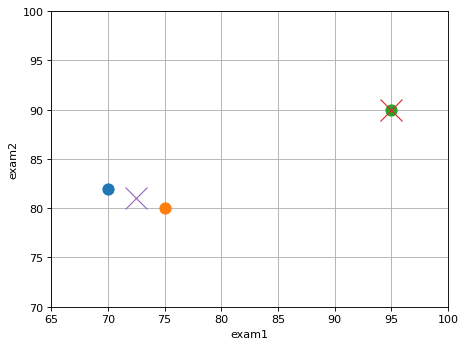

In [10]:
plt.figure(dpi=80) 
for i in range(nobs):
    plt.plot(data[i][0],data[i][1],marker="o", markersize=10)
for c in range(num_clusters):
    plt.plot(centroids[c][0],centroids[c][1],marker="x", markersize=20)
plt.xlim(65, 100)
plt.ylim(70, 100)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.grid()

## Calcolo WWSE

In [11]:
kmeans.inertia_

14.5

## K-means su un dataset reale

* un database alimentare che fornisce informazioni dettagliate sui valori nutrizionali di un'ampia gamma di alimenti. 
* 35 diversi valori per ogni alimento
    * **valore calorico**
    * **colesterolo**
    * **zuccheri**
    * **vari tipi di vitamine**
    * **carboidrati**
    *....
* disponibile in 
https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products?resource=download
    

## Analisi di un dataset reale: nutrition dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Analisi di un dataset reale: nutrition dataset

In [13]:
df = pd.read_csv("DataSets/nutrition.csv")
df

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


## Analisi di un dataset reale: nutrition dataset

In [14]:
print(df.columns)
print('records:', len(df))

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

## Preprocessing: specificare le colonne di interesse per l'analisi

In [15]:
vars = ['calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
         'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
         'vitamin_a', 'vitamin_a_rae', 'carotene_alpha']

df = df[['name'] + vars]
df.head(5)

,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha
0,Cornstarch,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg
1,"Nuts, pecans",691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg
2,"Eggplant, raw",25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg
3,"Teff, uncooked",367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg
4,"Sherbet, orange",144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg


## Preprocessing: Eliminazione dei valori nulli

In [16]:
df = df.dropna(axis=0)
print('records:', len(df))
df.head()

records: 7199


,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha
1,"Nuts, pecans",691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg
3,"Teff, uncooked",367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg
4,"Sherbet, orange",144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg
5,"Cauliflower, raw",25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,0.00 mcg,0.507 mg,0.667 mg,0.060 mg,0.050 mg,0.00 IU,0.00 mcg,0.00 mcg
6,"Taro leaves, raw",42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,0.084 mg,0.456 mg,0.209 mg,4825.00 IU,241.00 mcg,0.00 mcg


## Preprocessing: eliminare unità di misura

In [17]:
for var in vars:
    if not isinstance(df[var].values[0], np.int64):
        df[var] = df[var].str.extract(r'([.|\d]+)')
        # conversion stringhe in float
        df[var] = df[var].values.astype(float)

* utilizzo della regular expression **[.|\d]**
* restituisce qualsiasi sequenza che contenga un valore numerico da **0 a 9 (d)** o un **punto(.)**, ripetuti
* scarta la stringa che indica l'unità di misura

## Preprocessing dei dati: eliminare unità di misura

In [18]:
df.head()

,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha
1,"Nuts, pecans",691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0
3,"Teff, uncooked",367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0
4,"Sherbet, orange",144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0
5,"Cauliflower, raw",25,0.3,0.1,0.0,30.0,44.3,57.0,0.0,0.507,0.667,0.060,0.050,0.0,0.0,0.0
6,"Taro leaves, raw",42,0.7,0.2,0.0,3.0,12.8,126.0,0.0,1.513,0.084,0.456,0.209,4825.0,241.0,0.0


## Data Preprocessing: normalizzazione

* se una delle features ha valore molto più alto delle altre feature può **dominare** e invalidare l'esecuzione dell'algoritmo
* molti algoritmi di machine learning assumono che tutte le feature abbiano **la stessa scala**
* **StandardScaler** trasforma ogni feature in modo che
    * la **media** di ogni feature sia uguale a **0**
    * la **deviazione standard** di ogni feature sia uguale a **1**

## Data preprocessing: normalizzazione

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values[:,1:])
scaled_data

array([[ 2.61638007,  3.59630691,  0.2918927 , ..., -0.15178719,
        -0.11630191, -0.06443045],
       [ 0.66774749, -0.61934188, -0.55155579, ..., -0.16526523,
        -0.11985915, -0.06443045],
       [-0.67344098, -0.64356974, -0.43521806, ..., -0.15465486,
        -0.1056302 , -0.06443045],
       ...,
       [ 0.12646066,  0.62839325,  1.13534119, ..., -0.16784614,
        -0.11985915, -0.06443045],
       [-0.81176984, -0.58300008, -0.44976028, ..., -0.16669907,
        -0.11867341, -0.06443045],
       [-0.81176984, -0.58300008, -0.44976028, ..., -0.16612554,
        -0.11748766, -0.06443045]], shape=(7199, 15))

## Selezione di un sottoinsieme

In [21]:
food_subset = 175
scaled_data_sub = scaled_data[:food_subset]
scaled_data_sub

array([[ 2.61638007,  3.59630691,  0.2918927 , ..., -0.15178719,
        -0.11630191, -0.06443045],
       [ 0.66774749, -0.61934188, -0.55155579, ..., -0.16526523,
        -0.11985915, -0.06443045],
       [-0.67344098, -0.64356974, -0.43521806, ..., -0.15465486,
        -0.1056302 , -0.06443045],
       ...,
       [ 0.9383909 , -0.18929725, -0.40613363, ..., -0.16784614,
        -0.11985915, -0.06443045],
       [-1.19067062, -0.67991154, -0.58064022, ..., -0.1325738 ,
        -0.11985915, -0.06443045],
       [ 0.9444052 , -0.09844275,  0.71361695, ...,  0.01195674,
         0.10306106, -0.06443045]], shape=(175, 15))

## Esecuzione del k-means

In [23]:
scores = []
inertia = []
rand = 314
clus_range = np.arange(2,10)
for clus in clus_range:
    print(f'fitting k-means for {clus} clusters')
    kmeans = KMeans(n_clusters=clus,
                    random_state=rand,
                    n_init=100).fit(scaled_data_sub)   
    # calcola l'inerzia
    inertia.append(kmeans.inertia_)    
    # calcola la silhouette
    scores.append(silhouette_score(scaled_data_sub,
                                   kmeans.labels_,
                                   metric='euclidean'))

fitting k-means for 2 clusters
fitting k-means for 3 clusters
fitting k-means for 4 clusters
fitting k-means for 5 clusters
fitting k-means for 6 clusters
fitting k-means for 7 clusters
fitting k-means for 8 clusters
fitting k-means for 9 clusters


## Calcolo inerzia

Text(0, 0.5, 'WSSE')

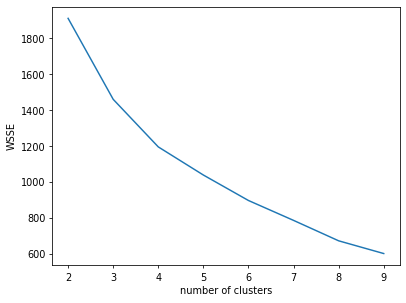

In [24]:
plt.figure(dpi=70) 
plt.plot(clus_range, inertia)
plt.xlabel('number of clusters')
plt.ylabel('WSSE')

## Calcolo Silhouette

Text(0, 0.5, 'silhouette score')

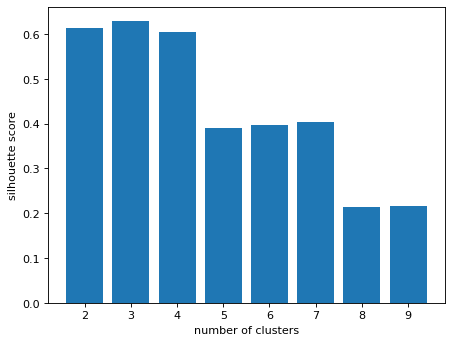

In [25]:
plt.figure(dpi=80) 
plt.bar(clus_range, scores)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')

## Riesecuzione di  k-means con la migliore silhouette

In [27]:
k_best = clus_range[np.argmax(scores)]
kmeans_final = KMeans(n_clusters=k_best, random_state=rand, n_init=100).fit(scaled_data_sub)
labels = kmeans_final.labels_
labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

## Assegnazione dei clusters

In [28]:
df_sub = df[['name']+vars].iloc[:food_subset]
# assegnazione etichette dei cluster
df_sub['cluster'] = labels
df_sub.head()

,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,cluster
1,"Nuts, pecans",691,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,1
3,"Teff, uncooked",367,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,0
4,"Sherbet, orange",144,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,0
5,"Cauliflower, raw",25,0.3,0.1,0.0,30.0,44.3,57.0,0.0,0.507,0.667,0.060,0.050,0.0,0.0,0.0,0
6,"Taro leaves, raw",42,0.7,0.2,0.0,3.0,12.8,126.0,0.0,1.513,0.084,0.456,0.209,4825.0,241.0,0.0,0


## Cardinalità dei clusters

In [29]:
df_sub['name'].groupby(df_sub.cluster).agg(func=len)

cluster
0    162
1     11
2      2
Name: name, dtype: int64

## Valore medio nutrizionale per cluster

In [30]:
df_sub.iloc[:,1:].groupby(df_sub.cluster).agg("mean").round(3)

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,cluster
cluster,,,,,,,,,,,,,,,,
0,245.111,9.659,2.738,23.377,399.056,19.430,50.253,6.654,3.026,0.551,0.229,0.220,807.586,70.988,11.093,0.0
1,721.091,78.273,27.909,141.455,6.545,120.827,25.364,0.000,0.623,0.490,0.094,0.200,656.273,174.091,6.364,1.0
2,296.500,8.750,1.550,0.000,1468.500,33.250,68.000,0.000,8.750,1.497,1.220,0.575,48975.000,2449.000,1045.000,2.0


## Distribuzione delle calorie

<Axes: xlabel='cluster', ylabel='calories'>

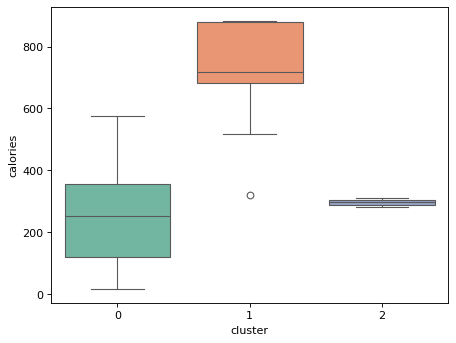

In [31]:
plt.figure(dpi=80) 
sns.boxplot(x='cluster',y='calories',data=df_sub,hue='cluster', palette='Set2', legend=False)

## Distribuzione dei grassi per cluster

<Axes: xlabel='cluster', ylabel='total_fat'>

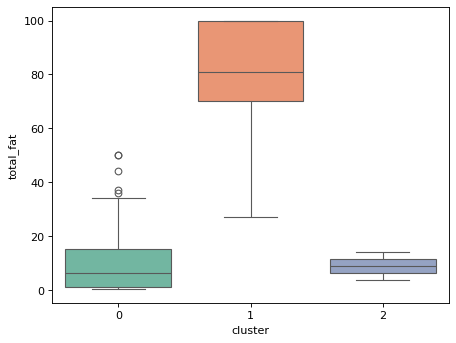

In [32]:
plt.figure(dpi=80) 
sns.boxplot(x='cluster',y='total_fat',data=df_sub,hue='cluster', palette='Set2', legend=False)

## Distribuzione dei cibi per classe

In [33]:
pd.set_option('display.max_rows', None)
for clus in np.arange(k_best):
    print(f'cluster {clus}')
    print(df_sub.name[df_sub.cluster==clus])
    print('')

cluster 0
3              Teff, uncooked
4             Sherbet, orange
5            Cauliflower, raw
6            Taro leaves, raw
7           Lamb, raw, ground
8           Cheese, camembert
9          Vegetarian fillets
13       Crackers, rusk toast
14      Chicken, boiled, feet
15      Quail, raw, meat only
16     Pie, lemon, fried pies
17     Peppers, raw, jalapeno
18     Winged bean tuber, raw
19     Salami, turkey, cooked
21     Nuts, raw, ginkgo nuts
22     Spices, ground, savory
23     Candies, sesame crunch
24     Cheese, low fat, cream
27     Ostrich, raw, top loin
28     Chewing gum, sugarless
30     Pasta, unenriched, dry
32     Cookies, Marie biscuit
33     Broccoli, raw, chinese
34     McDONALD'S, Hash Brown
36     Emu, raw, outside drum
37     Nuts, dried, beechnuts
39     Lentils, raw, sprouted
40     Gravy, mix, dry, onion
41     Pie, fruit, fried pies
42     Snacks, cakes, popcorn
43     Snack, Mixed Berry Bar
44      Fish, raw, sheepshead
46      Brussels sprouts, raw


## Esempi di tesi triennali

* un esempio diverso per area di ricerca
    * Taint analysis per ramsomware detection
    * Analisi di Ethereum smart contract 
    * Strumenti crittografici avanzati per  for blockchains 

## Ramsomware attacks e Bitcoin

<center>
<img src="Figures/Ramsomware.jpg" style="width:1000px;height:500px;align=left"/>

## Bitcoin Taint Analysis

* un metodo utilizzato per tracciare il flusso dei bitcoin da un indirizzo a un altro.
* obiettivo: determinare l'associazione di indirizzi Bitcoin a altri indirizzi, che ricevono denaro da operazioni potenzialmente illecite.
* utile per le indagini forensi sulla blockchain e per le investigazioni antiriciclaggio (AML) nel settore delle criptovalute.
* **taint** si riferisce alla proporzione di criptovaluta presente in un indirizzo che può essere asspcoaita ad attività criminali (es. mercati darknet, ransomware, hackeraggi).
    * ad esempio, se un wallet riceve **1 BTC** e **0,5 BTC** provengono da una fonte illecita nota, il wallet potrebbe essere considerato contaminato al **50%**

## Bitcoin Taint Analysis: le euristiche per il tracciamento

<center>
<img src="Figures/TaintStrategies.jpg" style="width:800px;height:600px;align=left"/>


## Bitcoin Taint Analysis: la strategia THIO

<center>
<img src="Figures/TIHO.jpg" style="width:500px;height:500px;align=left"/>

## Bitcoin Taint Analysis: il framework di analisi

<center>
<img src="Figures/Framework.jpg" style="width:600px;height:500px;align=left"/>

## Ethereum tokens

* un token Ethereum è un tipo di **asset digitale** costruito e gestito utilizzando la blockchain di Ethereum.
* a differenza di **Ether (ETH)**, che è la criptovaluta nativa di Ethereum, i token sono asset basati su smart contract 
    * possono essere creati scrivendo uno smart contract che ne gestisce il conio, la distribuzione, il trasferimento, etc.
* possono rappresentare qualsiasi **asset**: 
  * gettoni che danno qualche diritto (come i punti del supermercato!)
  * diritti di voto
  * stablecoin 
  * oggetti digitali da collezione

## Ethereum token: gli standard

<center>
<img src="Figures/TokenTypes.jpg" style="width:700px;height:500px;align=left"/>

## Analisi di token: confronto tra diversi tipi di token

<center>
<img src="Figures/TokenAnalysis1.jpg" style="width:500px;height:700px;align=left"/>

## Analisi di token: come vengono utilizzati gli ERC-1155

<center>
<img src="Figures/TokenAnalysi2.jpg" style="width:800px;height:400px;align=left"/>

## Strumenti crittografici avanzato per la  blockchain

* collaborazione con Prof. Bernasconi
* **crittografia avanzata**: crittografia oltre l'encryption e l'hash
* alcune tecniche 
    * **zero knowledge**
    * **multi party computation**
    * **homomorphic encryption**


<center>
<img src="Figures/AdvancedCryptography.jpg" style="width:800px;height:300px;align=left"/>

## Zero knowledge Proofs

* posseggo un segreto
    * voglio convincere qualcuno circa alcune proprietà del mio segreto
    * senza rivelare il segreto
* esempio: il mio segreto riguarda  la storia di tutti i  miei acquisti effettuati presso un supermercato
    * voglio provare che ho comprato 10 litri di latte questo mese, perchè così posso ottenere un coupon
    * senza rivelare niente altro sui miei acquisti


## Secure Multi-Party Computation

* siamo un gruppo, ognuno di noi ha un  proprio  dato che vuole mantenere segreto
    * calcoliamo collettivamente una funzione che ha in input tutti questi segreti
    * senza che nessuno riveli agli altri il proprio segreto
* esempio
    * si vuole valutare l'efficacia di un trattamento medico
    * dati da pazienti provenienti da cliniche diverse
    * voglio calcolare 
    l'efficacia del trattamento senza rivelare dati privati
    

<center>
<img src="Figures/MultiParty.jpg" style="width:800px;height:300px;align=left"/>

## Homomorphic Encryption 

* elaborazione su dati cifrati: anche il risultato è cifrato
* esempio: location services
    * cifro la mia locazione e la mando a GoogleMaps
    * GoogleMap effettaua un lookup su una tabella con i dati cifrati
        * reperisce tutti i ristoranti vicini alla mia locazione, senza conoscere la mia locazione effettiva
    * ricevo le raccomandazioni di Google Maps, in formato cifrato

<center>
<img src="Figures/HomomorphicEncryption.jpg" style="width:600px;height:300px;align=left"/>

## Argomenti di tesi

* la teoria alla base di queste tecniche è disponibile dagli anni '80...
* il problema è la loro ingegnerizzazione
    * dimensioni delle chiavi accettabile
    * costo computazionale accettabile
* prime implementazioni molto costose
* la blockchain ha dato una grande spinta verso la realizzazione di librerie più efficienti
* tesi possibili
    * valutazione e confronto di librerie
    * applicazione a casi di uso reali
    * non teoria di base o investigazione di nuovi metodi crittografici, ma crittografia applicata alle blockchain
